In [1]:
!pip install transformers
!pip install pyLDAvis
!pip install nltk
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Import required libraries, functions and classes

#Numpy and pandas for dataframes
import numpy as np
import pandas as pd

# nltk library for tokenization, lemmatizer, stopwords, pos tags and FreqDist
# import string for punctuation and str manipulations
import nltk
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
import string

#Gensim library for LDA model creation . Corpora in gensim to create the id2word Dictionary and corpus of terms
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

#visualization using matplotlib and pyLDAvis for the LDA model viz
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models

#import warnings to ignore deprecation warning
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from gensim.models import LdaModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

df = pd.read_excel('part-2.xlsx')

In [5]:
df.head()

,Home Town,Head Line,Review,Rating,Review Date,Vistited Date,Name,Level Contributor,Contributions,Votes,Places,Destination,Unnamed: 12
0,"Evanston, Illinois","“Clean, inviting zoo with a wide range of anim...",This is an excellent zoo. They have a number o...,4 of 5 stars,Reviewed 7 August 2015 NEW,Visited July 2015,andrewwymer,5.0,77.0,27.0,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,NaN
1,Bangalore,“Better to visit in Morning or Evening”,Size: Considerably large. By normal walk it ta...,4 of 5 stars,Reviewed 6 August 2015 NEW,Visited July 2015,336shyamd,NaN,NaN,NaN,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,NaN
2,"New Delhi, India",“Must visit place in mysore”,This is definitely the best zoo i hv visited i...,5 of 5 stars,Reviewed 5 August 2015 NEW,Visited January 2015,saanvi80,3.0,17.0,5.0,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,NaN
3,"Mumbai, India",“Nice to visit”,We visited the zoo with a lot of expectations ...,4 of 5 stars,Reviewed 4 August 2015 NEW,Visited August 2015,praveenkesavan,3.0,NaN,NaN,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,NaN
4,"Mysore, India","“Clean zoo, amazing animals .”",To know that this is not a Govt run ZOO is ama...,4 of 5 stars,Reviewed 4 August 2015 NEW,Visited April 2015,SujeshKP,2.0,NaN,NaN,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,NaN


In [6]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [7]:
df1 = df[['Head Line', 'Review', 'Places', 'Destination','Votes']]
df1 = df1.dropna(how='all', inplace=False)
null_rows = df1.isnull().sum(axis=1)
print(null_rows)
df1 = df1[null_rows==0]
df1.head()

0       0
1       1
2       0
3       1
4       1
       ..
6864    1
6865    1
6866    0
6867    1
6868    1
Length: 6869, dtype: int64


,Head Line,Review,Places,Destination,Votes
0,"“Clean, inviting zoo with a wide range of anim...",This is an excellent zoo. They have a number o...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,27.0
2,“Must visit place in mysore”,This is definitely the best zoo i hv visited i...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,5.0
5,“Zoom In to this Zoo!!”,one of the best zoos i have visited in india. ...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,22.0
6,“Must visit!”,Ranked#2 apparently in the country; it is defi...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,7.0
9,“One of the best zoos of India”,One of the best Zoos of the country. Tour arou...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore,38.0


In [8]:
reviews=df1

In [9]:
null_rows = df1.isnull().sum(axis=1)
print(null_rows)

0       0
2       0
5       0
6       0
9       0
       ..
6856    0
6858    0
6859    0
6861    0
6866    0
Length: 4620, dtype: int64


In [10]:
df=df1

In [11]:
filtered_df = df[df['Destination'] =='Kollur']
unique_places = filtered_df['Places'].unique()
print(unique_places)

['Sri Mookambika Temple']


In [12]:
def preprocess_text(text):
  text = text.lower()
  text = text.replace('\n', ' ')
  text = text.replace('_x000d_', ' ')
  text = text.replace(',', ' ')
  text = text.replace('.', ' ')
  text = text.replace('?', ' ')
  text = text.replace('!', ' ')
  text = text.replace(';', ' ')
  text = text.replace(':', ' ')
  text = text.replace('(', ' ')
  text = text.replace(')', ' ')
  return text

df['Review'] = df['Review'].astype(str)
df['Review'] = df['Review'].apply(preprocess_text) 
df1 = df1[df1['Destination'] == 'Kollur'] 
df1['Review'] = df1['Review'].apply(lambda review: review.lower()) 


C:\Users\nitin\AppData\Local\Temp\ipykernel_7812\6620127.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Review'] = df1['Review'].apply(lambda review: review.lower())


In [13]:
reviews_df=df1
reviews_df.head()

,Head Line,Review,Places,Destination,Votes
5900,“Awesome place for Darshan”,visited this place as it's been our long time ...,Sri Mookambika Temple,Kollur,16.0
5901,“Goddess of learning”,i am a regular visitor to this temple its loc...,Sri Mookambika Temple,Kollur,9.0
5903,“1200 year old temple - well maintained”,we took a detour from the nh after kundapur to...,Sri Mookambika Temple,Kollur,4.0
5904,“Beautiful and Powerful”,a very old temple dedicated to goddess mookamb...,Sri Mookambika Temple,Kollur,43.0
5906,“The closest you get to heaven on earth”,as you view the temple before you go in you s...,Sri Mookambika Temple,Kollur,20.0


In [14]:
reviews_df.count

<bound method DataFrame.count of                                      Head Line  \
5900               “Awesome place for Darshan”   
5901                     “Goddess of learning”   
5903  “1200 year old temple - well maintained”   
5904                  “Beautiful and Powerful”   
5906  “The closest you get to heaven on earth”   
...                                        ...   
6059                   “Renowned Great Temple”   
6060          “THE BEST PLACE FOR A HOLY TRIP”   
6061                    “Excellent experience”   
6063                       “In divine embrace”   
6065                       “divine experience”   

                                                 Review  \
5900  visited this place as it's been our long time ...   
5901  i am a regular visitor to this temple  its loc...   
5903  we took a detour from the nh after kundapur to...   
5904  a very old temple dedicated to goddess mookamb...   
5906  as you view the temple before you go in  you s...   
...         

### Task 2: Normalize casings for the review text and extract the text into a list for easier manipulation

In [15]:
review_list = [review for review in reviews_df["Review"]]
review_list[:5]

["visited this place as it's been our long time wish  a temple located in a peaceful mountainous area  refer to the timings on temple website to avoid waiting in long queues    q up at 4pm outside temple and get the morning glimpse and blessings of devi  don't forget to collect the prasadam in the evening called kashayam  for which booking needs to b done in the morning  meet the priest at tantrik guest house and book your pooja ",
 'i am a regular visitor to this temple  its locates inside a wildlife sanctuary  the atmosphere here is blessed with fresh air  its close to udupi and nearest railway station is byndur   mookambika road   the locality is known by the name "kollur"  the famous temple  kollur mookambika temple is blessed with nature around  goddess saraswathy with all her forms sould be feld here  famous musicians  poets  dancers comes here regularly to get the blessings  "saraswathy mandapam" is famous for the initiation of learning of all forms of skills  "kashayam"- one me

### Task 3:Tokenize the reviews using NLTKs word_tokenize function.

In [16]:
# Tokenize the reviews

rev_words = [word_tokenize(review) for review in review_list]
print(rev_words[:5])

[['visited', 'this', 'place', 'as', 'it', "'s", 'been', 'our', 'long', 'time', 'wish', 'a', 'temple', 'located', 'in', 'a', 'peaceful', 'mountainous', 'area', 'refer', 'to', 'the', 'timings', 'on', 'temple', 'website', 'to', 'avoid', 'waiting', 'in', 'long', 'queues', 'q', 'up', 'at', '4pm', 'outside', 'temple', 'and', 'get', 'the', 'morning', 'glimpse', 'and', 'blessings', 'of', 'devi', 'do', "n't", 'forget', 'to', 'collect', 'the', 'prasadam', 'in', 'the', 'evening', 'called', 'kashayam', 'for', 'which', 'booking', 'needs', 'to', 'b', 'done', 'in', 'the', 'morning', 'meet', 'the', 'priest', 'at', 'tantrik', 'guest', 'house', 'and', 'book', 'your', 'pooja'], ['i', 'am', 'a', 'regular', 'visitor', 'to', 'this', 'temple', 'its', 'locates', 'inside', 'a', 'wildlife', 'sanctuary', 'the', 'atmosphere', 'here', 'is', 'blessed', 'with', 'fresh', 'air', 'its', 'close', 'to', 'udupi', 'and', 'nearest', 'railway', 'station', 'is', 'byndur', 'mookambika', 'road', 'the', 'locality', 'is', 'known'

In [17]:
# POS tagging using NLTK pos tagger
pos_tagged_review = [pos_tag(review) for review in rev_words]
print(len(pos_tagged_review))
print(pos_tagged_review[:5])

135
[[('visited', 'VBN'), ('this', 'DT'), ('place', 'NN'), ('as', 'IN'), ('it', 'PRP'), ("'s", 'VBZ'), ('been', 'VBN'), ('our', 'PRP$'), ('long', 'JJ'), ('time', 'NN'), ('wish', 'VB'), ('a', 'DT'), ('temple', 'NN'), ('located', 'VBN'), ('in', 'IN'), ('a', 'DT'), ('peaceful', 'JJ'), ('mountainous', 'JJ'), ('area', 'NN'), ('refer', 'NN'), ('to', 'TO'), ('the', 'DT'), ('timings', 'NNS'), ('on', 'IN'), ('temple', 'JJ'), ('website', 'NN'), ('to', 'TO'), ('avoid', 'VB'), ('waiting', 'VBG'), ('in', 'IN'), ('long', 'JJ'), ('queues', 'NNS'), ('q', 'VBP'), ('up', 'RB'), ('at', 'IN'), ('4pm', 'CD'), ('outside', 'JJ'), ('temple', 'NN'), ('and', 'CC'), ('get', 'VB'), ('the', 'DT'), ('morning', 'NN'), ('glimpse', 'NN'), ('and', 'CC'), ('blessings', 'NNS'), ('of', 'IN'), ('devi', 'NN'), ('do', 'VBP'), ("n't", 'RB'), ('forget', 'VB'), ('to', 'TO'), ('collect', 'VB'), ('the', 'DT'), ('prasadam', 'NN'), ('in', 'IN'), ('the', 'DT'), ('evening', 'NN'), ('called', 'VBN'), ('kashayam', 'NN'), ('for', 'IN'),

In [18]:
nltk.help.upenn_tagset(tagpattern='NN*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [19]:
# Limit the data to only terms with noun tags

pos_noun_reviews = []
for review in pos_tagged_review:
    nouns=[]
    for word_tuple in review:
        if "NN" in word_tuple[1]:
            nouns.append(word_tuple)
    pos_noun_reviews.append(nouns)

print(pos_noun_reviews[:50])

[[('place', 'NN'), ('time', 'NN'), ('temple', 'NN'), ('area', 'NN'), ('refer', 'NN'), ('timings', 'NNS'), ('website', 'NN'), ('queues', 'NNS'), ('temple', 'NN'), ('morning', 'NN'), ('glimpse', 'NN'), ('blessings', 'NNS'), ('devi', 'NN'), ('prasadam', 'NN'), ('evening', 'NN'), ('kashayam', 'NN'), ('needs', 'NNS'), ('morning', 'NN'), ('priest', 'NN'), ('guest', 'NN'), ('house', 'NN'), ('book', 'NN'), ('pooja', 'NN')], [('i', 'NN'), ('visitor', 'NN'), ('temple', 'NN'), ('locates', 'NNS'), ('wildlife', 'NN'), ('atmosphere', 'NN'), ('air', 'NN'), ('close', 'NN'), ('railway', 'NN'), ('station', 'NN'), ('road', 'NN'), ('locality', 'NN'), ('name', 'NN'), ('kollur', 'NN'), ('temple', 'NN'), ('kollur', 'NN'), ('temple', 'NN'), ('nature', 'NN'), ('goddess', 'NN'), ('saraswathy', 'NN'), ('forms', 'NNS'), ('musicians', 'NNS'), ('poets', 'NNS'), ('dancers', 'NNS'), ('blessings', 'NNS'), ('mandapam', 'NN'), ('initiation', 'NN'), ('learning', 'NN'), ('forms', 'NNS'), ('skills', 'NNS'), ('kashayam', 'N

In [20]:
# Exclude any reviews that did not have any nouns as these reviews will be blank or empty sublists []

pos_noun_reviews=[review for review in pos_noun_reviews if len(review)>=1]
print(len(pos_noun_reviews), pos_noun_reviews[:50])

135 [[('place', 'NN'), ('time', 'NN'), ('temple', 'NN'), ('area', 'NN'), ('refer', 'NN'), ('timings', 'NNS'), ('website', 'NN'), ('queues', 'NNS'), ('temple', 'NN'), ('morning', 'NN'), ('glimpse', 'NN'), ('blessings', 'NNS'), ('devi', 'NN'), ('prasadam', 'NN'), ('evening', 'NN'), ('kashayam', 'NN'), ('needs', 'NNS'), ('morning', 'NN'), ('priest', 'NN'), ('guest', 'NN'), ('house', 'NN'), ('book', 'NN'), ('pooja', 'NN')], [('i', 'NN'), ('visitor', 'NN'), ('temple', 'NN'), ('locates', 'NNS'), ('wildlife', 'NN'), ('atmosphere', 'NN'), ('air', 'NN'), ('close', 'NN'), ('railway', 'NN'), ('station', 'NN'), ('road', 'NN'), ('locality', 'NN'), ('name', 'NN'), ('kollur', 'NN'), ('temple', 'NN'), ('kollur', 'NN'), ('temple', 'NN'), ('nature', 'NN'), ('goddess', 'NN'), ('saraswathy', 'NN'), ('forms', 'NNS'), ('musicians', 'NNS'), ('poets', 'NNS'), ('dancers', 'NNS'), ('blessings', 'NNS'), ('mandapam', 'NN'), ('initiation', 'NN'), ('learning', 'NN'), ('forms', 'NNS'), ('skills', 'NNS'), ('kashayam'

### Lemmatize

In [21]:
# Lemmatize the different forms of the nouns
# POS tags not passed to lemmatizer

wnl = WordNetLemmatizer()
lemmatized_words =[]
for review in pos_noun_reviews:
    lemma_word=[]
    for word in review:
        lemma_word.append(wnl.lemmatize(word[0]))
    lemmatized_words.append(lemma_word)

print(lemmatized_words[:50])

[['place', 'time', 'temple', 'area', 'refer', 'timing', 'website', 'queue', 'temple', 'morning', 'glimpse', 'blessing', 'devi', 'prasadam', 'evening', 'kashayam', 'need', 'morning', 'priest', 'guest', 'house', 'book', 'pooja'], ['i', 'visitor', 'temple', 'locates', 'wildlife', 'atmosphere', 'air', 'close', 'railway', 'station', 'road', 'locality', 'name', 'kollur', 'temple', 'kollur', 'temple', 'nature', 'goddess', 'saraswathy', 'form', 'musician', 'poet', 'dancer', 'blessing', 'mandapam', 'initiation', 'learning', 'form', 'skill', 'kashayam', 'water', 'day', 'panacea', 'sort', 'disease', 'temple', 'archana', 'assistance', 'priest', 'chariot', 'chariot', 'deity', 'ritual', 'hill', 'temple', 'service'], ['detour', 'nh', 'kundapur', 'byndoor', 'journey', 'hour', 'something', 'drive', 'plenty', 'turn', 'road', 'feeling', 'temple', 'queue', 'rush', 'darshan', 'goddess', 'parvati', 'gold', 'temple', 'plenty', 'space', 'amount', 'shop', 'stuff', 'restaurant', 'place', "'tourists"], ['temple'

### Remove Stop Words

In [22]:
# The o/p from lemmatizer still has many composite words that still contain emojis , special characters etc.
# Using tweet tokenizer for isolating them better.
tweet_tokenize = TweetTokenizer()

#Create list of stopwords with punctuations.Manually added token ['\s'] as this is usually seperated in tokenize
stop_words = stopwords.words("english")
stop_words = stop_words+list(string.punctuation)+["\'s"]

filtered_rev_words=[]

for review in lemmatized_words:
    filter_words=[]
    for words in review:
        rev_words = []
        rev_words = tweet_tokenize.tokenize(words)
        for word in rev_words:
            if word not in stop_words:
                filter_words.append(word)
    filtered_rev_words.append(filter_words)

In [23]:
# Exclude any reviews that contained only stopwords as these reviews will be blank or empty sublists []
filtered_rev_words=[review for review in filtered_rev_words if len(review)>=1]
print(len(filtered_rev_words),filtered_rev_words[:100])

135 [['place', 'time', 'temple', 'area', 'refer', 'timing', 'website', 'queue', 'temple', 'morning', 'glimpse', 'blessing', 'devi', 'prasadam', 'evening', 'kashayam', 'need', 'morning', 'priest', 'guest', 'house', 'book', 'pooja'], ['visitor', 'temple', 'locates', 'wildlife', 'atmosphere', 'air', 'close', 'railway', 'station', 'road', 'locality', 'name', 'kollur', 'temple', 'kollur', 'temple', 'nature', 'goddess', 'saraswathy', 'form', 'musician', 'poet', 'dancer', 'blessing', 'mandapam', 'initiation', 'learning', 'form', 'skill', 'kashayam', 'water', 'day', 'panacea', 'sort', 'disease', 'temple', 'archana', 'assistance', 'priest', 'chariot', 'chariot', 'deity', 'ritual', 'hill', 'temple', 'service'], ['detour', 'nh', 'kundapur', 'byndoor', 'journey', 'hour', 'something', 'drive', 'plenty', 'turn', 'road', 'feeling', 'temple', 'queue', 'rush', 'darshan', 'goddess', 'parvati', 'gold', 'temple', 'plenty', 'space', 'amount', 'shop', 'stuff', 'restaurant', 'place', 'tourists'], ['temple', 

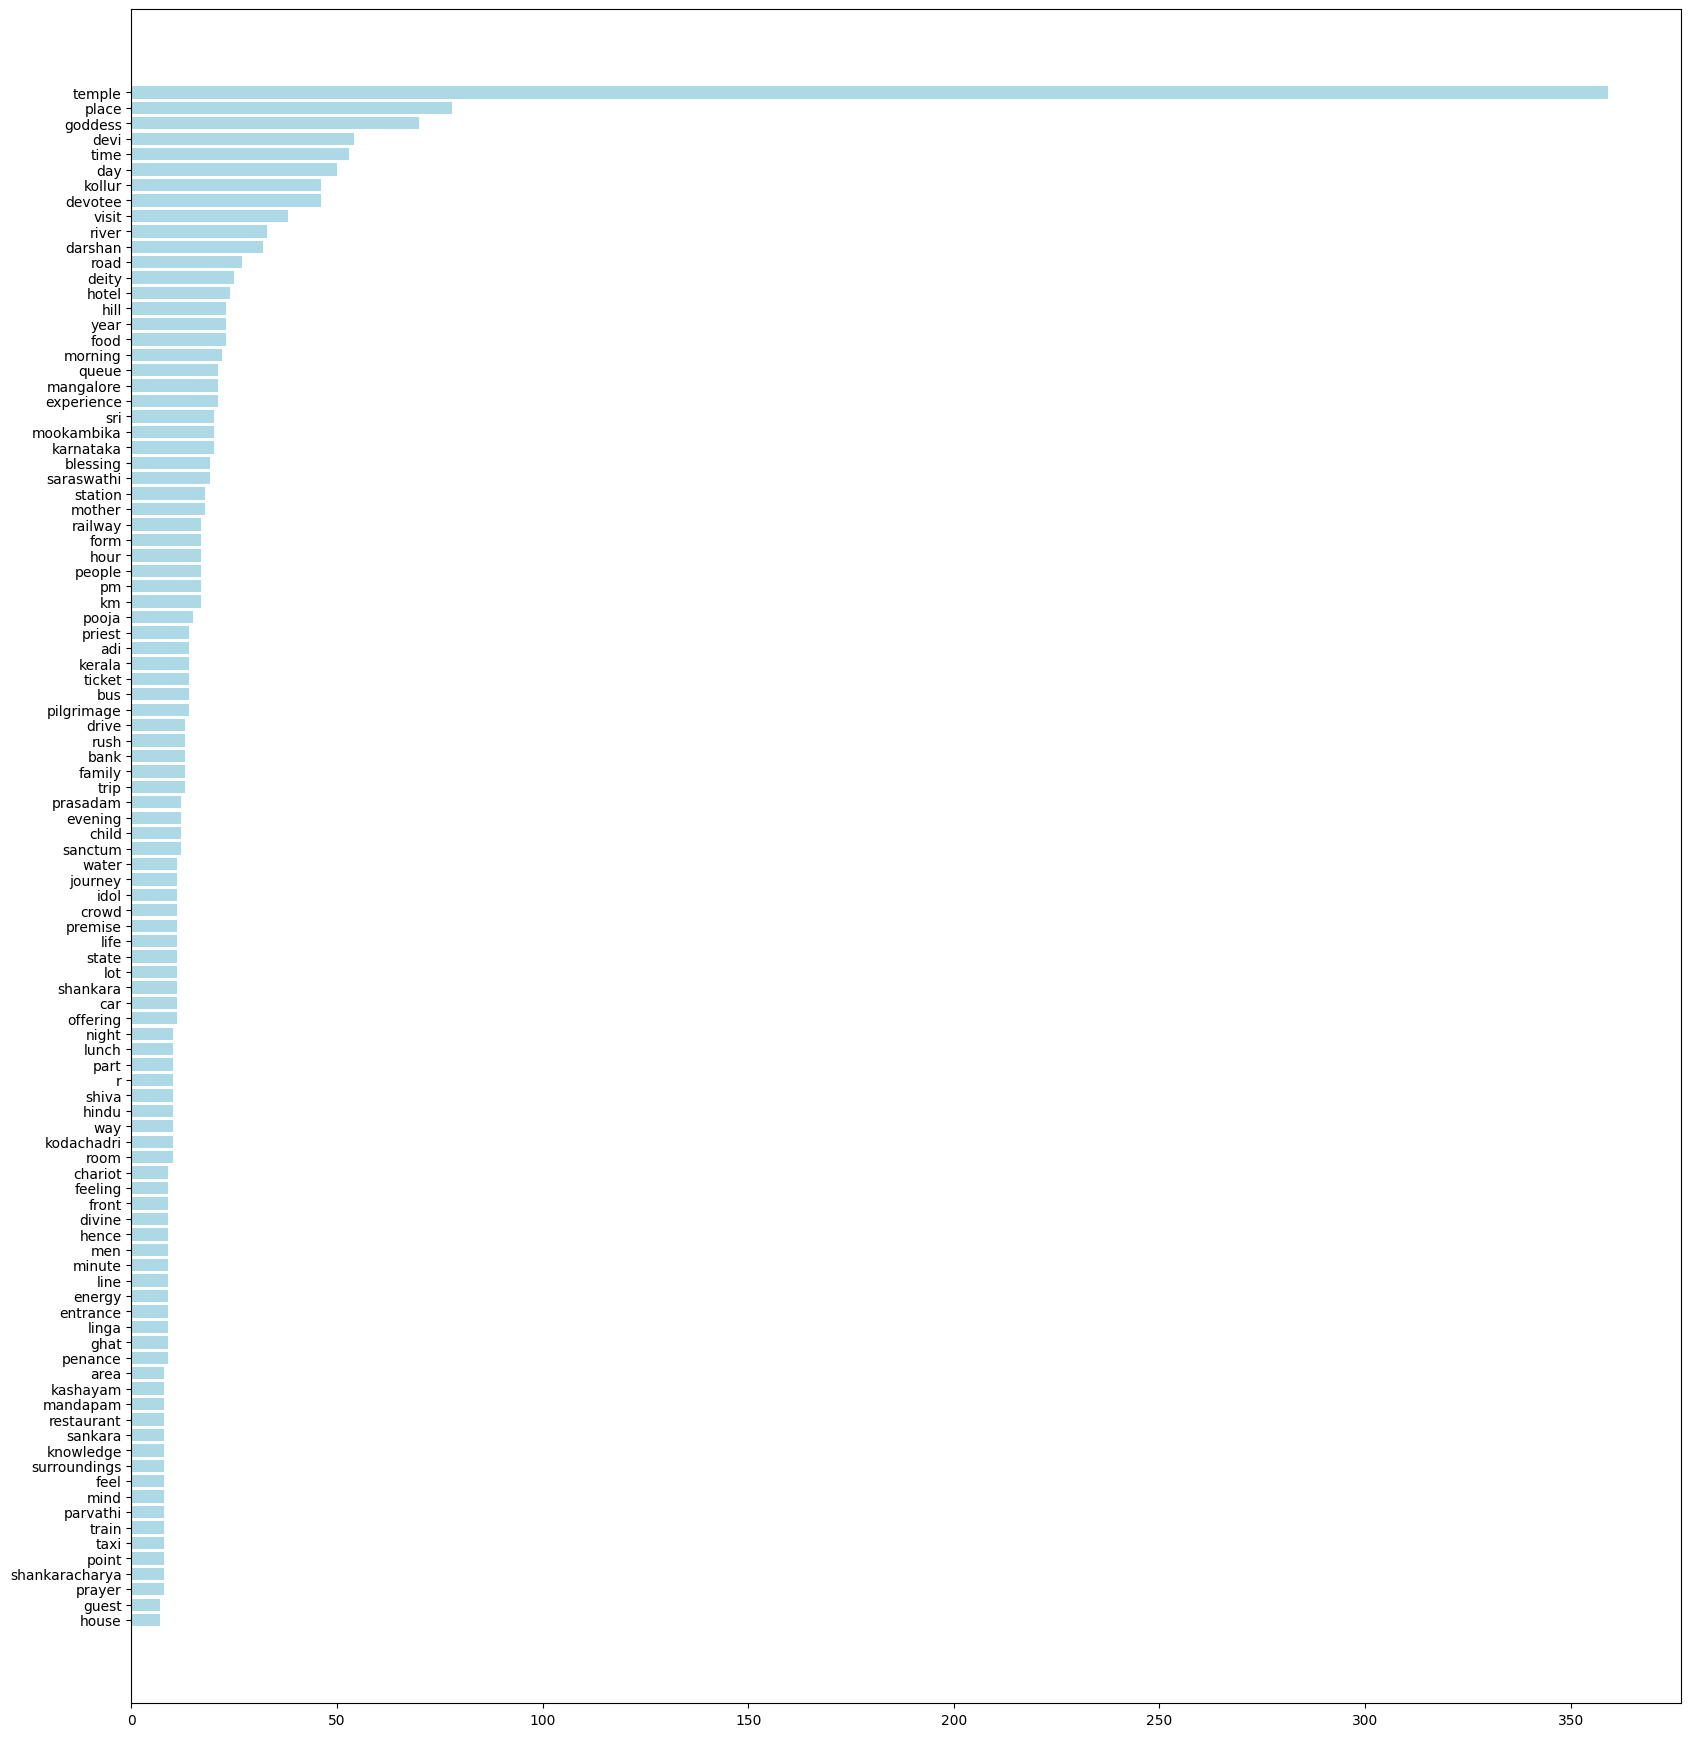

In [24]:
# Barplot to visualize the 100 most common words using FreqDist and barplots

list_of_words = [word for review in filtered_rev_words for word in review]
common_word_freq=FreqDist(list_of_words).most_common(100)
word_list = common_word_freq[::-1]

words,freq = [],[]
for word in word_list:
    words.append(word[0])
    freq.append(word[1])
x=np.array(words)
y=np.array(freq)

plt.figure(figsize=(20,22))
plt.barh(x,y,color="lightblue")
plt.show()

In [25]:
print(common_word_freq)

[('temple', 359), ('place', 78), ('goddess', 70), ('devi', 54), ('time', 53), ('day', 50), ('kollur', 46), ('devotee', 46), ('visit', 38), ('river', 33), ('darshan', 32), ('road', 27), ('deity', 25), ('hotel', 24), ('hill', 23), ('year', 23), ('food', 23), ('morning', 22), ('queue', 21), ('mangalore', 21), ('experience', 21), ('sri', 20), ('mookambika', 20), ('karnataka', 20), ('blessing', 19), ('saraswathi', 19), ('station', 18), ('mother', 18), ('railway', 17), ('form', 17), ('hour', 17), ('people', 17), ('pm', 17), ('km', 17), ('pooja', 15), ('priest', 14), ('adi', 14), ('kerala', 14), ('ticket', 14), ('bus', 14), ('pilgrimage', 14), ('drive', 13), ('rush', 13), ('bank', 13), ('family', 13), ('trip', 13), ('prasadam', 12), ('evening', 12), ('child', 12), ('sanctum', 12), ('water', 11), ('journey', 11), ('idol', 11), ('crowd', 11), ('premise', 11), ('life', 11), ('state', 11), ('lot', 11), ('shankara', 11), ('car', 11), ('offering', 11), ('night', 10), ('lunch', 10), ('part', 10), ('

In [26]:
# Revising the stopwords based of above analysis
stop_words_inclusions = ["...","..",'phone','lenovo','k8','note','product',
                         'mobile','hai','please','pls','star','hi','ho','ok','handset','part','etc','number','point','thing','everything','mysore']
stop_words = stop_words + stop_words_inclusions


#isalnum() to remove emoji an isnumeric() to remove only number tokens present in the list
#len(word)!=1 will eliminate all one letter tokens such as 'u','i' etc.
final_rev_words = []
for review in filtered_rev_words:
    stopwords_removed_review=[]
    for word in review:
        if word not in stop_words and word.isalnum() and (not word.isnumeric()) and len(word)!=1:
            stopwords_removed_review.append(word)
    final_rev_words.append(stopwords_removed_review)

In [27]:
# Clearing any reviews which are now empty lists after removal of revised stop words
final_rev_words=[review for review in final_rev_words if len(review)>=1]
print(len(final_rev_words),final_rev_words[:50])

135 [['place', 'time', 'temple', 'area', 'refer', 'timing', 'website', 'queue', 'temple', 'morning', 'glimpse', 'blessing', 'devi', 'prasadam', 'evening', 'kashayam', 'need', 'morning', 'priest', 'guest', 'house', 'book', 'pooja'], ['visitor', 'temple', 'locates', 'wildlife', 'atmosphere', 'air', 'close', 'railway', 'station', 'road', 'locality', 'name', 'kollur', 'temple', 'kollur', 'temple', 'nature', 'goddess', 'saraswathy', 'form', 'musician', 'poet', 'dancer', 'blessing', 'mandapam', 'initiation', 'learning', 'form', 'skill', 'kashayam', 'water', 'day', 'panacea', 'sort', 'disease', 'temple', 'archana', 'assistance', 'priest', 'chariot', 'chariot', 'deity', 'ritual', 'hill', 'temple', 'service'], ['detour', 'nh', 'kundapur', 'byndoor', 'journey', 'hour', 'something', 'drive', 'plenty', 'turn', 'road', 'feeling', 'temple', 'queue', 'rush', 'darshan', 'goddess', 'parvati', 'gold', 'temple', 'plenty', 'space', 'amount', 'shop', 'stuff', 'restaurant', 'place', 'tourists'], ['temple', 

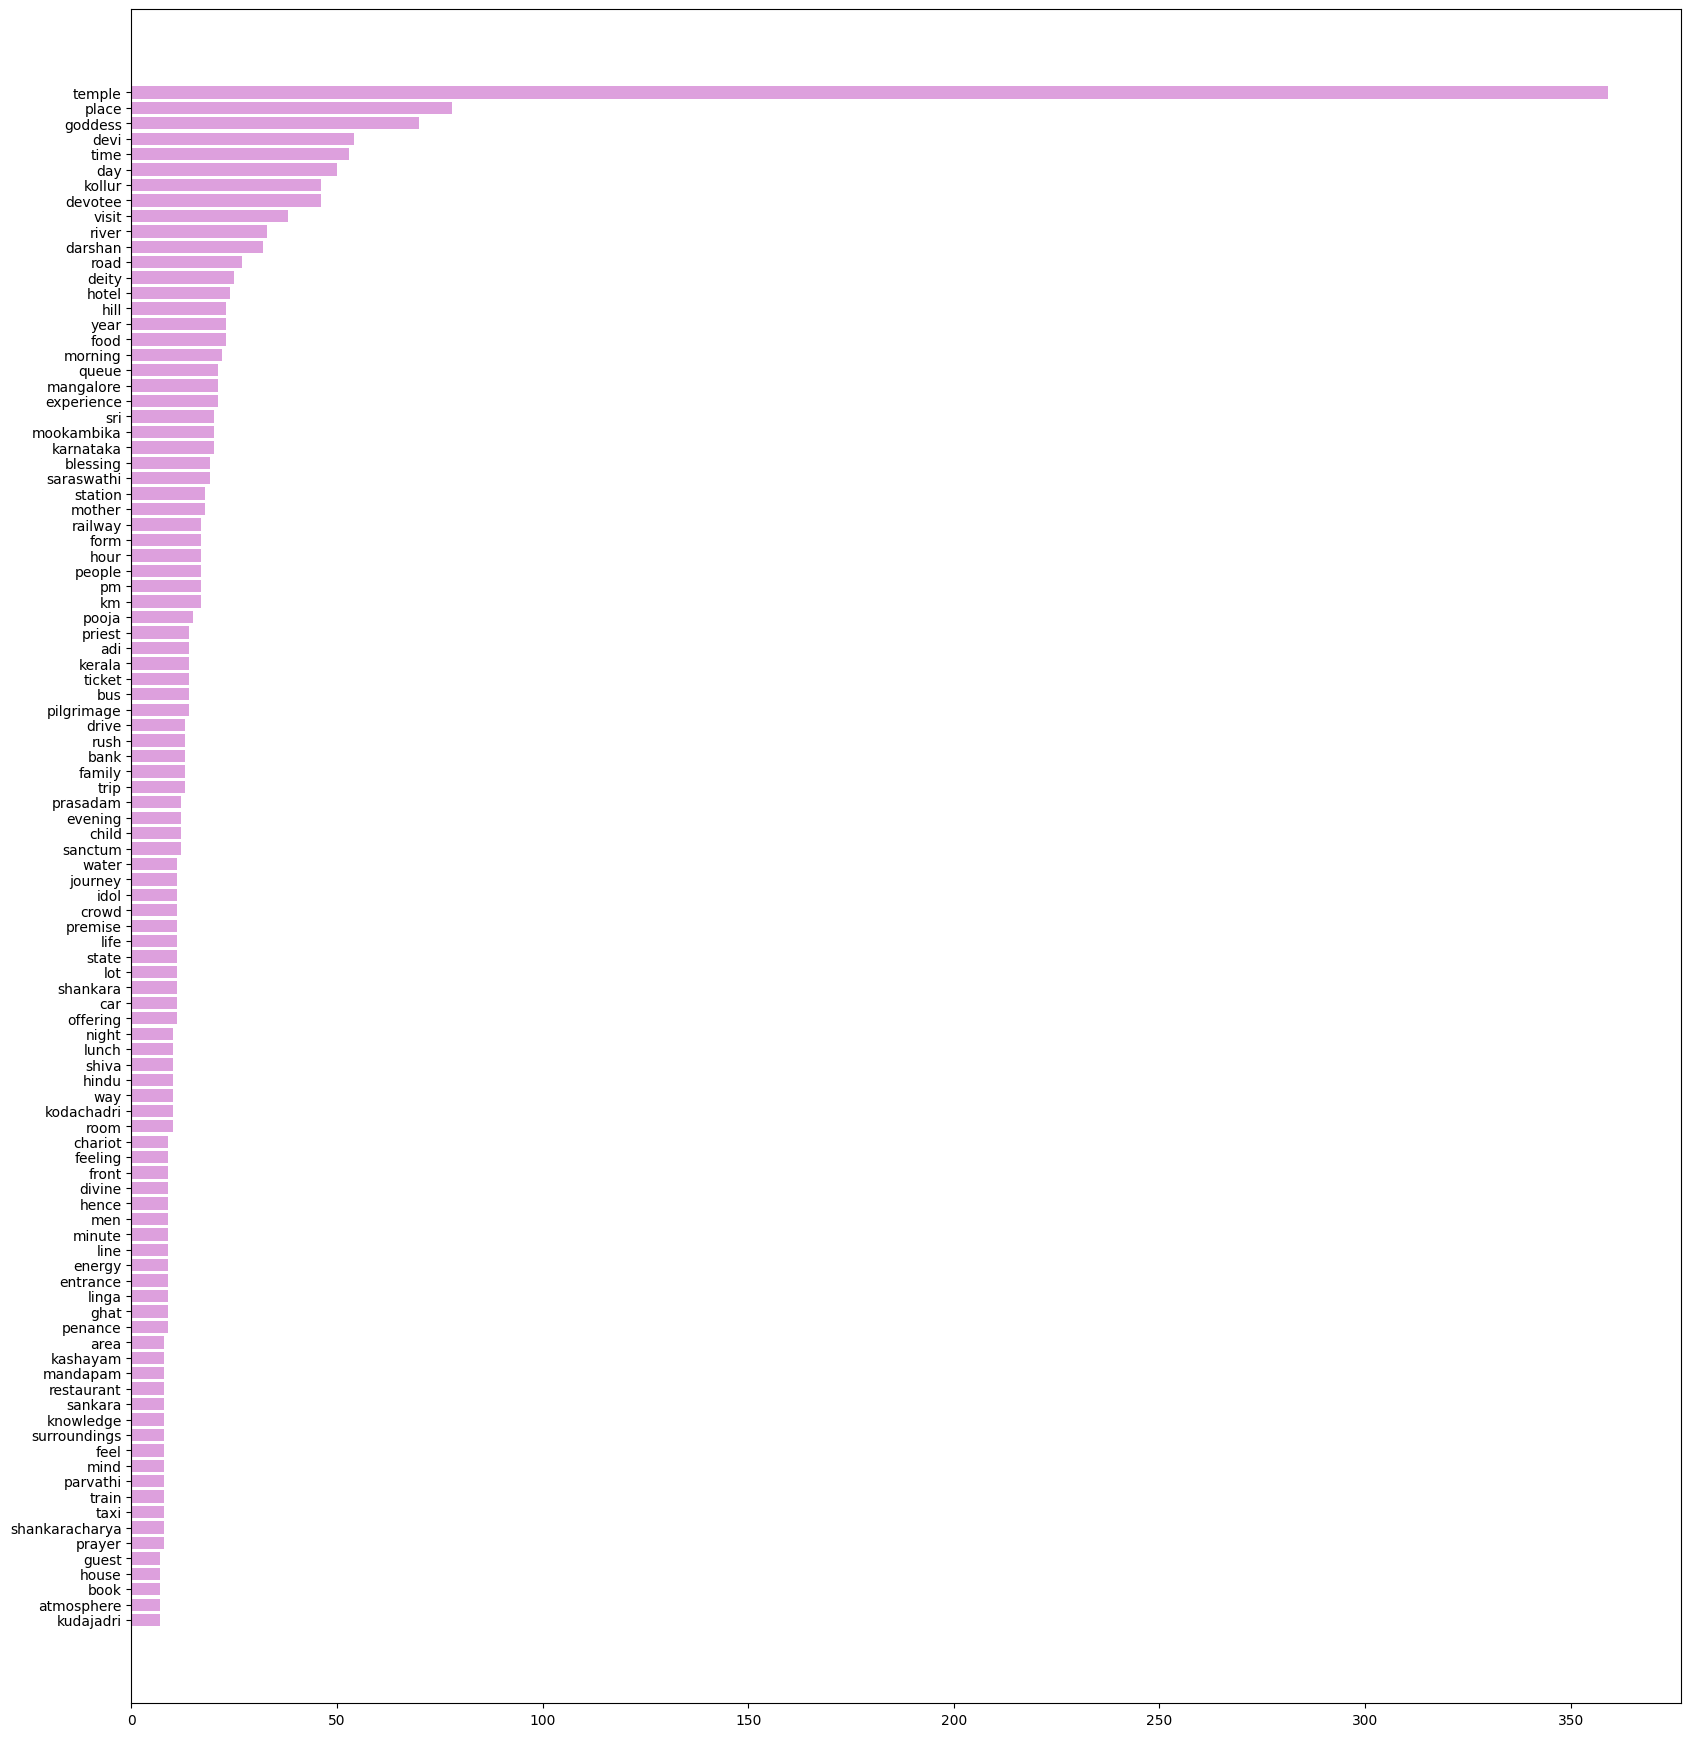

In [28]:
# Barplot to visualize the 100 most common words using FreqDist and barplots

list_of_words = [word for review in final_rev_words for word in review]
word_freq=FreqDist(list_of_words).most_common(100)
word_list_2 = word_freq[::-1]

words,freq = [],[]
for word in word_list_2:
    words.append(word[0])
    freq.append(word[1])
x=np.array(words)
y=np.array(freq)

plt.figure(figsize=(20,22))
plt.barh(x,y,color="plum")
plt.show()

### Task 8: Create a topic model using LDA on the cleaned-up data .

In [29]:
# First creating the id2word Dictionary and corpus of words required for the LDA topic model

id2word = corpora.Dictionary(final_rev_words)

corpus =[]
for review in final_rev_words:
    new = id2word.doc2bow(review)
    corpus.append(new)

print(corpus[:20],"\n")
print("No of reviews:",len(corpus),"\n")
print("No of unique words:",len(id2word),"\n")

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1)], [(1, 1), (8, 1), (14, 1), (17, 5), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)], [(11, 1), (15, 1), (17, 2), (32, 1), (47, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [(3, 1), (17, 4), (32, 1), (33, 1), (60, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)], [(17, 1), (18, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95,

In [30]:
topic_count=6

In [31]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topic_count,
                                           random_state=47,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto",
                                          eta=1.0)

In [32]:
lda_model.print_topics(num_topics=topic_count)

[(0,
  '0.005*"sister" + 0.005*"mr" + 0.004*"team" + 0.004*"devaswam" + 0.003*"family" + 0.003*"energy" + 0.003*"devi" + 0.003*"dist" + 0.003*"cab" + 0.002*"cherpalchery"'),
 (1,
  '0.003*"forever" + 0.003*"gift" + 0.003*"preists" + 0.003*"run" + 0.003*"sancitity" + 0.003*"seeveli" + 0.003*"commercialisation" + 0.003*"prasadams" + 0.002*"tradition" + 0.002*"authority"'),
 (2,
  '0.074*"temple" + 0.016*"goddess" + 0.013*"place" + 0.012*"devotee" + 0.012*"time" + 0.012*"day" + 0.011*"kollur" + 0.010*"devi" + 0.008*"visit" + 0.007*"river"'),
 (3,
  '0.005*"offering" + 0.004*"adiga" + 0.004*"behalf" + 0.004*"express" + 0.004*"rath" + 0.004*"mind" + 0.004*"area" + 0.003*"wife" + 0.003*"rate" + 0.003*"pilgrimage"'),
 (4,
  '0.002*"waste" + 0.001*"article" + 0.001*"hub" + 0.001*"sunilkunnoth" + 0.001*"com" + 0.001*"soul" + 0.001*"peaceful" + 0.001*"holy" + 0.001*"stream" + 0.001*"sewage"'),
 (5,
  '0.005*"taxi" + 0.004*"group" + 0.002*"lot" + 0.002*"rlystation" + 0.002*"toreach" + 0.002*"palc

In [33]:
# Top terms for each topic.

topics=[]
topic_terms=[]
for idx in range(topic_count):
    topics.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda_model.get_topic_terms(idx,topn=5):
        terms.append(id2word[term[0]])
    topic_terms.append(terms)

for idx in range(topic_count):
    print(idx,topic_terms[idx])

0 ['sister', 'mr', 'devaswam', 'team', 'family']
1 ['sancitity', 'preists', 'forever', 'run', 'gift']
2 ['temple', 'goddess', 'place', 'devotee', 'time']
3 ['offering', 'adiga', 'behalf', 'express', 'rath']
4 ['waste', 'sunilkunnoth', 'com', 'hub', 'article']
5 ['taxi', 'group', 'lot', 'rlystation', 'toreach']


In [34]:
df_topics = pd.DataFrame(topic_terms).transpose()
df_topics.columns = topics
df_topics

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,sister,sancitity,temple,offering,waste,taxi
1,mr,preists,goddess,adiga,sunilkunnoth,group
2,devaswam,forever,place,behalf,com,lot
3,team,run,devotee,express,hub,rlystation
4,family,gift,time,rath,article,toreach


## Word Clouds

In [35]:
topics=[]
topic_terms=[]
for idx in range(topic_count):
    topics.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda_model.get_topic_terms(idx,topn=50):
        terms.append(id2word[term[0]])
    topic_terms.append(terms)

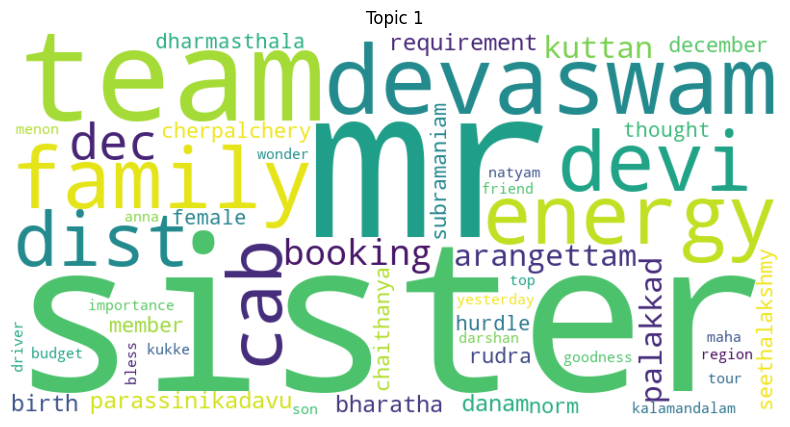

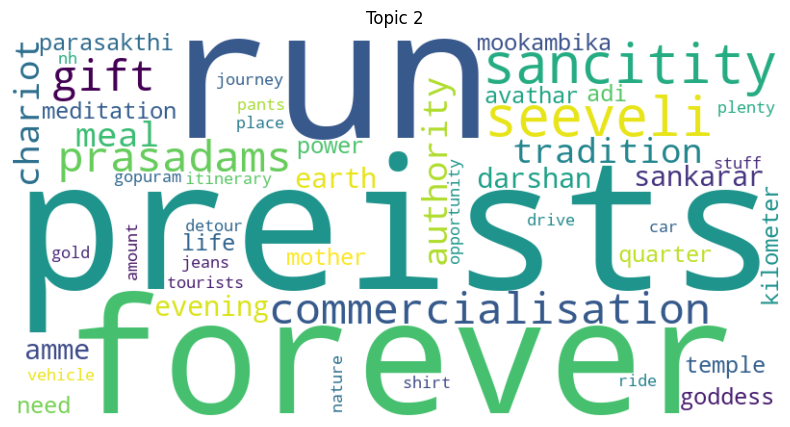

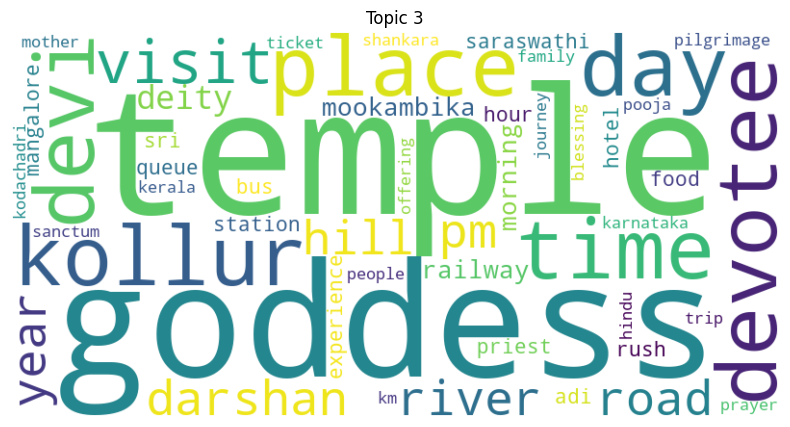

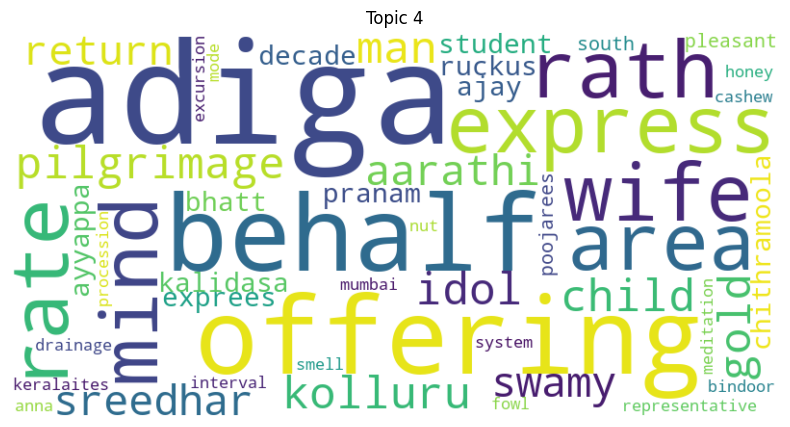

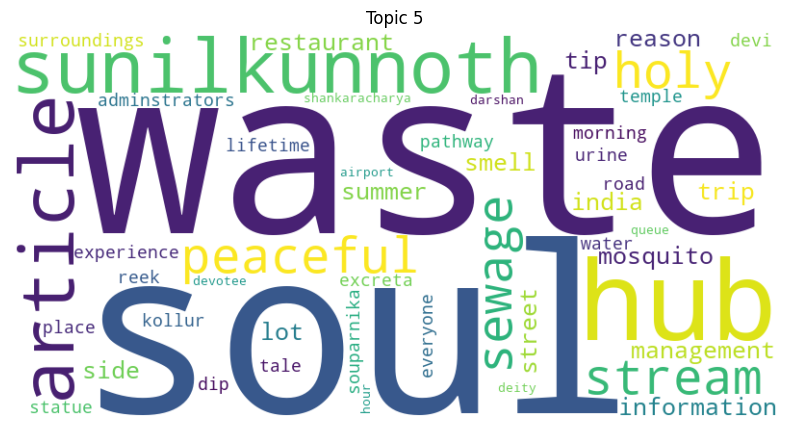

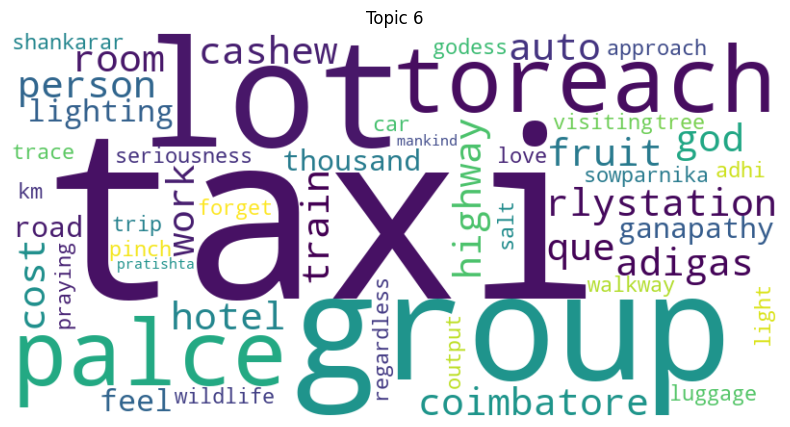

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you already have 'topics' and 'topic_terms' lists

# Create word clouds for each topic
for idx in range(topic_count):
    terms_str = ' '.join(topic_terms[idx])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(terms_str)

    # Plot the WordCloud image                        
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(topics[idx])
    plt.show()


In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
# Assuming you already have 'topics' and 'topic_terms' lists

# Create a folder to save the word cloud images
output_folder = "wordcloud_images"
os.makedirs(output_folder, exist_ok=True)

# Create word clouds for each topic
for idx in range(topic_count):
    terms_str = ' '.join(topic_terms[idx])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(terms_str)

    # Plot the WordCloud image                        
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(topics[idx])

    # Save the WordCloud image to a file
    output_file = f"{output_folder}/wordcloud_topic_{idx}.png"
    plt.savefig(output_file, bbox_inches='tight')

    # Close the plot to avoid displaying it in the notebook
    plt.close()

# Optionally, you can display a message or list the saved image files
print(f"Word cloud images saved in '{output_folder}' folder.")


Word cloud images saved in 'wordcloud_images' folder.


## BERT

In [38]:
import torch
from transformers import BertTokenizer, BertModel

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)


def get_bert_embeddings(text):
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    input_ids = torch.tensor(input_ids).unsqueeze(0)

    with torch.no_grad():
        outputs = model(input_ids)
        # Access the last hidden states directly
        embeddings = outputs[0][:, 0, :].numpy()

    return embeddings

def get_bert_embeddings_for_topics(lda_topics):
    topic_embeddings = []

    for topic in lda_topics:
        topic_text = " ".join([id2word[term[0]] for term in topic])
        embeddings = get_bert_embeddings(topic_text)
        topic_embeddings.append(embeddings)

    return topic_embeddings

# Assuming you have a variable 'topic_count' defined
topic_count = 6

lda_topics = [lda_model.get_topic_terms(topic_idx, topn=5) for topic_idx in range(topic_count)]

# Get BERT embeddings for the LDA topics
bert_embeddings_lda_topics = get_bert_embeddings_for_topics(lda_topics)


## Sihoullete score

In [39]:
from geneticalgorithm import geneticalgorithm as ga
from sklearn.cluster import KMeans

num_clusters_kmeans = 3
kmeans = KMeans(n_clusters=num_clusters_kmeans, random_state=47)
bert_embeddings_flat = np.array(bert_embeddings_lda_topics).reshape(len(bert_embeddings_lda_topics), -1)

kmeans.fit(bert_embeddings_flat)


# Get cluster assignments for each LDA topic using K-Means
cluster_assignments_kmeans = kmeans.labels_
print("Without Genetic Algorithm",cluster_assignments_kmeans)
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for K-Means clusters
silhouette_avg = silhouette_score(bert_embeddings_flat,kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Without Genetic Algorithm [2 1 0 1 1 1]
Silhouette Score: 0.09259770065546036


C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


__________________________________________________ 1.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|_________________________________________________ 2.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||________________________________________________ 4.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||_______________________________________________ 6.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||______________________________________________ 7.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||______________________________________________ 9.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||____________________________________________ 11.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||____________________________________________ 13.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||___________________________________________ 14.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||__________________________________________ 16.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||________________________________________ 19.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||________________________________________ 21.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||_______________________________________ 22.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||______________________________________ 23.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||______________________________________ 25.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||____________________________________ 27.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||____________________________________ 29.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||__________________________________ 31.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||__________________________________ 33.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||________________________________ 35.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||________________________________ 37.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||_______________________________ 38.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||______________________________ 40.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||||_____________________________ 42.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||____________________________ 44.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||||||___________________________ 46.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||__________________________ 47.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||__________________________ 49.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||________________________ 51.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||________________________ 52.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||________________________ 53.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||______________________ 55.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||______________________ 56.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||||||||||||_____________________ 58.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||____________________ 59.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||____________________ 61.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||||__________________ 63.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||||__________________ 65.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||||||||||||||||_________________ 66.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||||||________________ 68.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||||||||||||||||||_______________ 70.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||||||||______________ 72.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||||||||||||||||||||_____________ 74.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||||||||||____________ 76.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||||||||||||||||||||||___________ 78.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||||||||||||__________ 80.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||||||||||||||||||||||||_________ 82.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||||||||||||||________ 84.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||||||||||||||||______ 87.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||||||||||||||||______ 88.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||||||||||||||||||||||||||||_____ 90.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||||||||||||||||||____ 92.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||||||||||||||||||||||||||||||___ 94.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

||||||||||||||||||||||||||||||||||||||||||||||||__ 96.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||||||||||||||||||||||||||||||||_ 98.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...

C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

 The best solution found:                                                                           
 [2.]

 Objective function:
 -0.17862273752689362


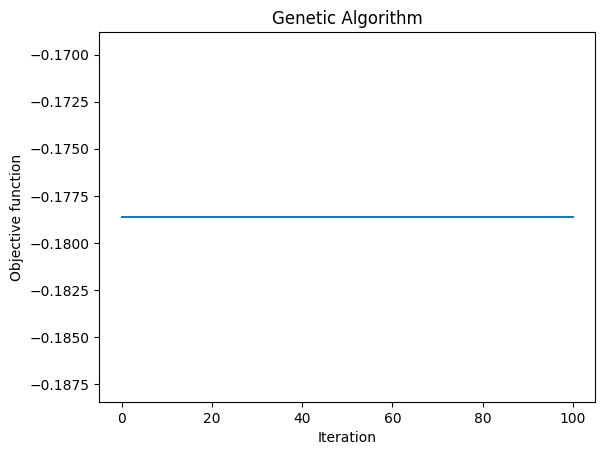

With Genetic Algorithm [0 1 0 1 1 1]
Optimal Number of Clusters: 2
Optimal Silhouette Score: 0.17862273752689362


C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from geneticalgorithm import geneticalgorithm as ga

# Function to calculate the negative silhouette score (to be minimized by GA)
def fitness_function(X):
    k = int(round(X[0]))  # The number of clusters (rounded to an integer)
    
    kmeans = KMeans(n_clusters=k, random_state=47)
    kmeans.fit(bert_embeddings_flat)
    
    silhouette_avg = silhouette_score(bert_embeddings_flat, kmeans.labels_)
    
    return -silhouette_avg  # Negative silhouette score for minimization

# Define the bounds for the number of clusters

varbound = np.array([[2,(len(kmeans.labels_)//2 )+2]])

# Define the GA algorithm parameters
algorithm_param = {'max_num_iteration': 100, 'population_size': 10, 'parents_portion': 0.3, 'mutation_probability': 0.1,
                   'elit_ratio': 0.01, 'crossover_probability': 0.5, 'crossover_type': 'uniform',
                   'max_iteration_without_improv': None,'verbose': 0}

# Create the GA model
model = ga(function=fitness_function,
           dimension=1,
           variable_type='int',
           variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)

# Run the GA optimization
model.run()

# Get the optimal number of clusters
optimal_k = int(round(model.output_dict['variable'][0]))

# Perform K-Means clustering with the optimal number of clusters
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=47)
optimal_kmeans.fit(bert_embeddings_flat)

# Get cluster assignments for each LDA topic using the optimal K-Means
optimal_cluster_assignments = optimal_kmeans.labels_
print("With Genetic Algorithm", optimal_cluster_assignments)

# Print the optimal number of clusters and the silhouette score
print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Optimal Silhouette Score: {-model.output_dict['function']}")


# Coherence Score

In [41]:
from gensim.models import CoherenceModel


coherence_model_lda_updated = CoherenceModel(
    model=lda_model,  
    texts=final_rev_words,  
    dictionary=id2word, 
    coherence='c_v'  
)

coherence_lda_updated = coherence_model_lda_updated.get_coherence()
print('\nUpdated Coherence Score: ', coherence_lda_updated)



Updated Coherence Score:  0.46388415653555


# Final Clusters 

In [42]:
clustered_topics = {i: [] for i in range(optimal_k)}
top_terms_per_cluster = {i: [] for i in range(optimal_k)}
cluster_terms_lists = []

for idx, cluster_assignment in enumerate(optimal_cluster_assignments):
    clustered_topics[cluster_assignment].append((f'Topic {idx + 1}', topic_terms[idx]))

for cluster_idx, topics_in_cluster in clustered_topics.items():
    # Extract top terms from each cluster
    top_terms = [term for _, terms in topics_in_cluster for term in terms]

    # Store the top terms in the dictionary
    top_terms_per_cluster[cluster_idx] = top_terms

    # Combine the terms to create the word cloud text
    cluster_text = ' '.join(top_terms)

    # Generate the word cloud or perform other tasks as needed

    # Append the top terms for the current cluster to the list
    cluster_terms_lists.append(top_terms)

# Print or use the top terms for each cluster
for cluster_idx, top_terms in top_terms_per_cluster.items():
    print(f"Cluster {cluster_idx} - Top Terms: {', '.join(top_terms)}")

# Access each cluster's top terms as separate lists
for cluster_idx, terms_list in enumerate(cluster_terms_lists):
    print(f"Cluster {cluster_idx} - Top Terms List: {terms_list}")


Cluster 0 - Top Terms: sister, mr, team, devaswam, family, energy, devi, dist, cab, dec, booking, arangettam, kuttan, palakkad, parassinikadavu, requirement, danam, bharatha, birth, cherpalchery, seethalakshmy, subramaniam, member, december, rudra, chaithanya, norm, dharmasthala, female, thought, hurdle, importance, maha, natyam, menon, kalamandalam, kukke, tour, wonder, anna, driver, friend, goodness, yesterday, top, darshan, bless, region, budget, son, temple, goddess, place, devotee, time, day, kollur, devi, visit, river, darshan, year, road, pm, hill, deity, mookambika, railway, morning, saraswathi, station, sri, hotel, mangalore, experience, queue, food, bus, hour, rush, priest, adi, pilgrimage, km, sanctum, shankara, pooja, karnataka, offering, mother, hindu, kodachadri, family, people, kerala, trip, prayer, ticket, blessing, journey
Cluster 1 - Top Terms: preists, run, forever, sancitity, seeveli, commercialisation, gift, prasadams, tradition, authority, meal, chariot, evening, 

In [43]:
# Display clusters like this
cluster_0_terms_list = cluster_terms_lists[0]
print(f"Cluster 0 - Top Terms List: {cluster_0_terms_list}")

Cluster 0 - Top Terms List: ['sister', 'mr', 'team', 'devaswam', 'family', 'energy', 'devi', 'dist', 'cab', 'dec', 'booking', 'arangettam', 'kuttan', 'palakkad', 'parassinikadavu', 'requirement', 'danam', 'bharatha', 'birth', 'cherpalchery', 'seethalakshmy', 'subramaniam', 'member', 'december', 'rudra', 'chaithanya', 'norm', 'dharmasthala', 'female', 'thought', 'hurdle', 'importance', 'maha', 'natyam', 'menon', 'kalamandalam', 'kukke', 'tour', 'wonder', 'anna', 'driver', 'friend', 'goodness', 'yesterday', 'top', 'darshan', 'bless', 'region', 'budget', 'son', 'temple', 'goddess', 'place', 'devotee', 'time', 'day', 'kollur', 'devi', 'visit', 'river', 'darshan', 'year', 'road', 'pm', 'hill', 'deity', 'mookambika', 'railway', 'morning', 'saraswathi', 'station', 'sri', 'hotel', 'mangalore', 'experience', 'queue', 'food', 'bus', 'hour', 'rush', 'priest', 'adi', 'pilgrimage', 'km', 'sanctum', 'shankara', 'pooja', 'karnataka', 'offering', 'mother', 'hindu', 'kodachadri', 'family', 'people', 'k

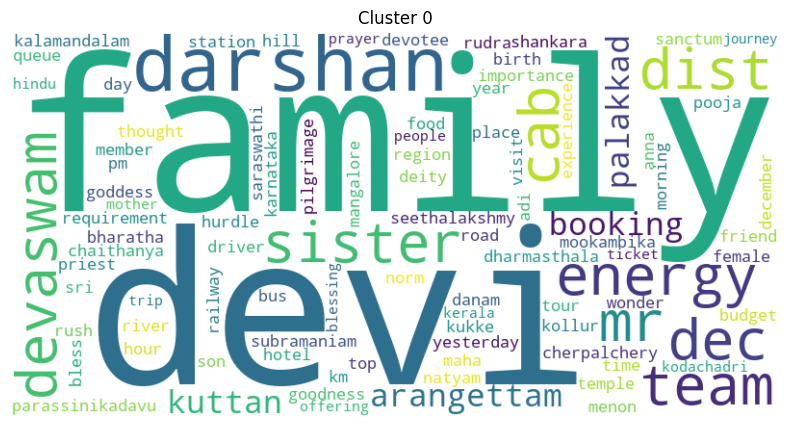

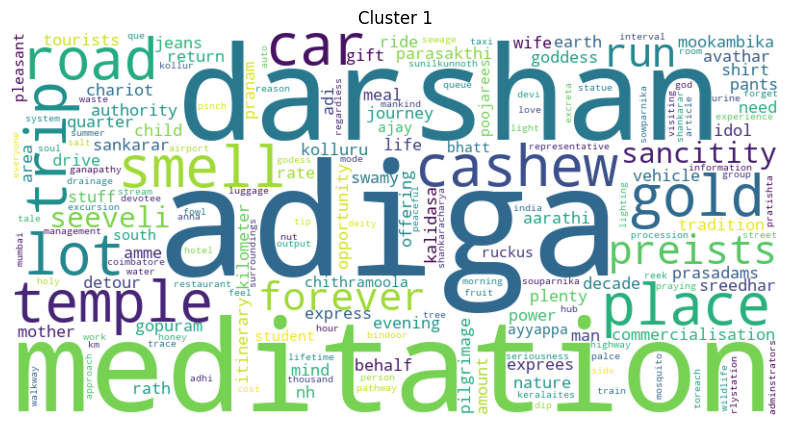

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


clustered_topics = {i: [] for i in range(optimal_k)}


for idx, cluster_assignment in enumerate(optimal_cluster_assignments):
    clustered_topics[cluster_assignment].append((f'Topic {idx + 1}', topic_terms[idx]))

for cluster_idx, topics_in_cluster in clustered_topics.items():
    cluster_text = ' '.join([term for _, terms in topics_in_cluster for term in terms])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_idx}')
    plt.show()


In [45]:
import pyLDAvis.gensim

# Visualize the LDA model
vis = pyLDAvis.gensim.prepare(lda_model, corpus,id2word)

pyLDAvis.save_html(vis, 'lda_visualization.html')
